## Linear Regression Model for 2020 Dataset

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#Read all the Excel Files which have Report Data from 2016 to 2020
df_2020=pd.read_csv('./2020.csv')
df_2020['Happiness Rank'] =  range(1, len(df_2020.index)+1)
df_2020 = df_2020.rename(columns = {'Country name' : 'Country', 'Ladder score' : 'Happiness Score', 
                        'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 
                                    'Healthy life expectancy' : 'Health (Life Expectancy)',
                        'Freedom to make life choices' : 'Freedom', 
                                    'Perceptions of corruption' : 'Trust (Government Corruption)'})
df_2020['Year']=2020

df_2019 = pd.read_csv('./2019.csv')
df_2019['Year']=2019
df_2019 = df_2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'Trust (Government Corruption)'})

df_2018 = pd.read_csv('./2018.csv')
df_2018['Year']=2018
df_2018 = df_2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'Trust (Government Corruption)'})
df_2017 = pd.read_csv('./2017.csv')
df_2017 = df_2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})
df_2017['Year']=2017

df_2016= pd.read_csv('./2016.csv')
df_2016['Year']=2016

df_2015 = pd.read_csv('./2015.csv')
df_2015['Year']=2015

df_all = pd.concat([df_2020,df_2019,df_2018,df_2017,df_2016,df_2015])

df_all=df_all[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year']]
df_all.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,-0.059482,2020
1,Denmark,2,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,0.066202,2020
2,Switzerland,3,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,0.105911,2020
3,Iceland,4,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,0.246944,2020
4,Norway,5,7.4880,11.087804,0.952487,73.200783,0.955750,0.263218,0.134533,2020


In [2]:
y=df_2020['Happiness Score']
X=df_2020[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Ladder score in Dystopia']]

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_test_preds = lin_reg.predict(X_test)
score=lin_reg.score(X_test, Y_test)
mse = mean_squared_error(Y_test, y_test_preds)
mae = mean_absolute_error(Y_test, y_test_preds)
r2 = r2_score(Y_test, y_test_preds)
r2, mse
print("The r-squared score for the Test model using only quantitative variables was {} on {} values.".format(r2,len(y_test_preds)))

The r-squared score for the Test model using only quantitative variables was 0.5822946834680569 on 31 values.


In [3]:
y=df_2020['Happiness Score']
X=df_2020[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom',
       'Trust (Government Corruption)', 'Ladder score in Dystopia']]

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_test_preds = lin_reg.predict(X_test)
score=lin_reg.score(X_test, Y_test)
mse = mean_squared_error(Y_test, y_test_preds)
mae = mean_absolute_error(Y_test, y_test_preds)
r2 = r2_score(Y_test, y_test_preds)
r2, mse
print("The r-squared score for the Test model using only quantitative variables except Generosity was {} on {} values.".format(r2,len(y_test_preds)))

The r-squared score for the Test model using only quantitative variables except Generosity was 0.5997813846014516 on 31 values.


The Accuracy Increased when the Genorosity Feature is removed from the model

In [4]:
df_all.fillna((df_all.mean()), inplace = True)
y=df_all['Happiness Score']
X=df_all[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
       'Trust (Government Corruption)']]

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_test_preds = lin_reg.predict(X_test)
score=lin_reg.score(X_test, Y_test)
mse = mean_squared_error(Y_test, y_test_preds)
mae = mean_absolute_error(Y_test, y_test_preds)
r2 = r2_score(Y_test, y_test_preds)
r2, mse
print("The r-squared score for the Test model using only quantitative variables was {} on {} values.".format(r2,len(y_test_preds)))

The r-squared score for the Test model using only quantitative variables was 0.6596653871355431 on 187 values.


In [5]:
y=df_2020['Happiness Score']
X=df_2020[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Ladder score in Dystopia']]

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_train_preds = lin_reg.predict(X_train)
score=lin_reg.score(X_train, Y_train)
mse = mean_squared_error(Y_train, y_train_preds)
mae = mean_absolute_error(Y_train, y_train_preds)
r2 = r2_score(Y_train, y_train_preds)
r2, mse
print("The r-squared score for the Train model using only quantitative variables was {} on {} values.".format(r2,len(y_train_preds)))

The r-squared score for the Train model using only quantitative variables was 0.7652214982201763 on 122 values.


In [6]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


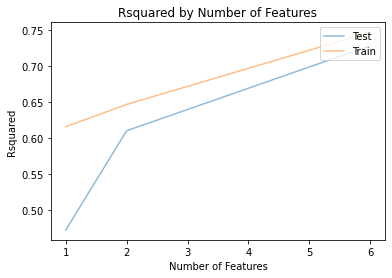

[0.4721753984716849, 0.4721753984716849, 0.4721753984716849, 0.6098080796737866, 0.7277635120396058, 0.7277635120396058, 0.7277635120396058, 0.7277635120396058, 0.7277635120396058, 0.7277635120396058] [0.6153966063077794, 0.6153966063077794, 0.6153966063077794, 0.6463441282507583, 0.7465176531369253, 0.7465176531369253, 0.7465176531369253, 0.7465176531369253, 0.7465176531369253, 0.7465176531369253] LinearRegression(normalize=True)      Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
108                  9.403371  0.852532                 56.506012  0.759330   
90                   8.350645  0.728601                 57.203987  0.794797   
104                  9.417931  0.671070                 68.708138  0.781994   
16                  10.732819  0.898874                 72.202019  0.867371   
111                  7.468545  0.712944                 53.889454  0.665564   
..                        ...       ...                       ...       ...   
71          

In [8]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)
print(r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test)

**Conclusion** - Linear Regression has low mean squared error for both train(76%) and test(59%) still the performance can be improved with the usage of other Algorithms

In [9]:
r2_scores_test

[0.4721753984716849,
 0.4721753984716849,
 0.4721753984716849,
 0.6098080796737866,
 0.7277635120396058,
 0.7277635120396058,
 0.7277635120396058,
 0.7277635120396058,
 0.7277635120396058,
 0.7277635120396058]